In [10]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [25]:
init_spec = """
[CityPop] > Applied @ 100
Applied > Eligible @ 0.25
Eligible > Background @ 1.0
Background > ReadyToOnboard @ 0.75
ReadyToOnboard > Onboarded @ 0.9
"""
init_model = parse(init_spec)

fast_spec = """

[CityPop] > Applied @ 100
Applied > EligibleAndBackground @ 0.25
EligibleAndBackground > ReadyToOnboard @ 0.75
ReadyToOnboard > Onboarded @ 0.9
"""

fast_model = parse(fast_spec)

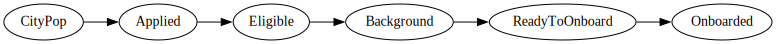

In [26]:
as_dot(init_model)

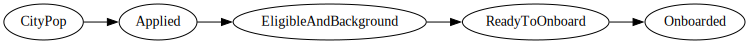

In [27]:
as_dot(fast_model)

In [29]:
init_results = init_model.run(rounds=10)
rendered = init_model.render_html(init_results)
HTML(rendered)

Round,Applied,Eligible,Background,ReadyToOnboard,Onboarded
0,0,0,0,0,0
1,100,0,0,0,0
2,100,25,0,0,0
3,100,25,25,0,0
4,100,25,25,18,0
5,100,25,25,18,16
6,100,25,25,18,32
7,100,25,25,18,48
8,100,25,25,18,64
9,100,25,25,18,80


In [30]:
fast_results = fast_model.run(rounds=10)
rendered = fast_model.render_html(fast_results)
HTML(rendered)

Round,Applied,EligibleAndBackground,ReadyToOnboard,Onboarded
0,0,0,0,0
1,100,0,0,0
2,100,25,0,0
3,100,25,18,0
4,100,25,18,16
5,100,25,18,32
6,100,25,18,48
7,100,25,18,64
8,100,25,18,80
9,100,25,18,96


In [32]:
fast_results[:3]

[{'CityPop': inf,
  'Applied': 0,
  'EligibleAndBackground': 0,
  'ReadyToOnboard': 0,
  'Onboarded': 0},
 {'CityPop': inf,
  'Applied': 100,
  'EligibleAndBackground': 0,
  'ReadyToOnboard': 0,
  'Onboarded': 0},
 {'CityPop': inf,
  'Applied': 100,
  'EligibleAndBackground': 25,
  'ReadyToOnboard': 0,
  'Onboarded': 0}]

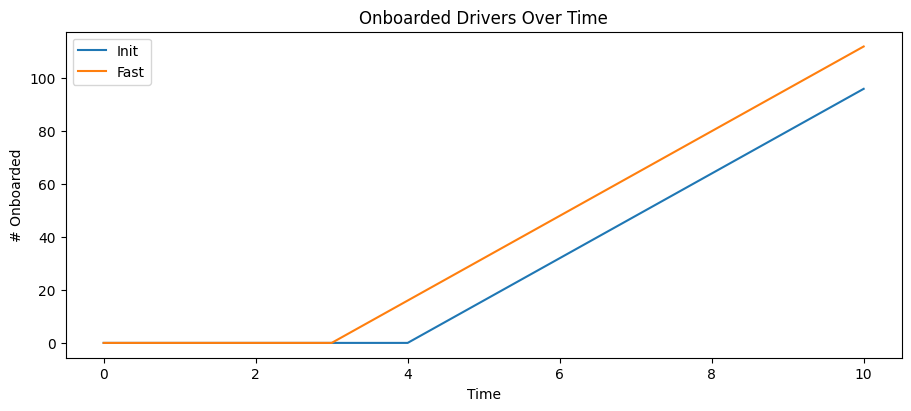

In [38]:

init_onboarded = [x['Onboarded'] for x in init_results]
fast_onboarded = [x['Onboarded'] for x in fast_results]

#fig, ax = plt.subplots()  # Create a figure containing a single axes.
fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

ax.set_title("Onboarded Drivers Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("# Onboarded")

ax.plot(init_onboarded, label='Init')
ax.plot(fast_onboarded, label='Fast')

ax.legend()

